Importing required libraries

In [ ]:
!pip install yfinance==0.1.67

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
from datetime import datetime
import requests
from bs4 import BeautifulSoup
import requests
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
import sklearn

In [ ]:
zomato = yf.Ticker('ZOMATO.NS') 

In [ ]:
zomato = zomato.history(period = 'max')

In [ ]:
zomato.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-07-23,116.000000,138.899994,115.000000,126.000000,694895290,0,0
2021-07-26,126.349998,143.750000,125.300003,140.649994,249723854,0,0
2021-07-27,141.699997,147.800003,127.750000,132.899994,240341900,0,0
2021-07-28,131.000000,135.000000,123.550003,131.199997,159793731,0,0
2021-07-29,134.949997,144.000000,132.199997,141.550003,117973089,0,0


In [ ]:
zomato.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-02-28,53.700001,54.400002,53.000000,53.500000,45414869,0,0
2023-03-01,53.500000,55.349998,53.349998,54.950001,42854827,0,0
2023-03-02,54.750000,55.200001,54.349998,54.549999,36256148,0,0
2023-03-03,54.900002,55.400002,53.200001,53.650002,36943821,0,0
2023-03-06,54.000000,54.950001,53.700001,53.950001,33492583,0,0


In [ ]:
zomato.reset_index(inplace=True) # Inserts index

<AxesSubplot:xlabel='Date'>

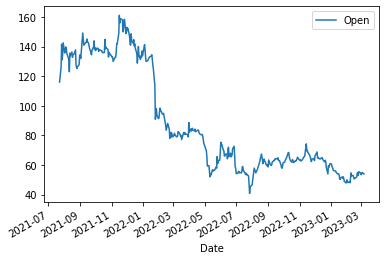

In [ ]:
zomato.plot(x="Date", y="Open")

<AxesSubplot:xlabel='Date'>

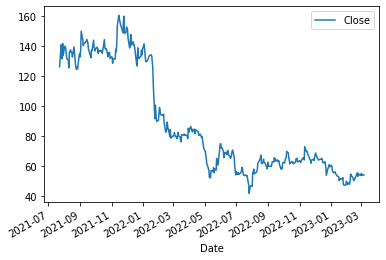

In [ ]:
zomato.plot(x="Date", y="Close")

<AxesSubplot:xlabel='Date'>

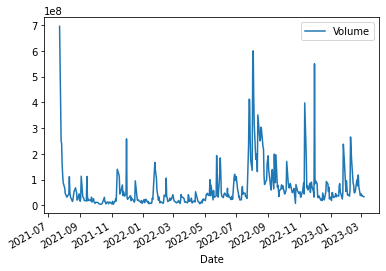

In [ ]:
zomato.plot(x="Date", y="Volume")

In [ ]:
close = zomato.reset_index()['Close']

In [ ]:
close

0      126.000000
1      140.649994
2      132.899994
3      131.199997
4      141.550003
          ...    
399     53.500000
400     54.950001
401     54.549999
402     53.650002
403     53.950001
Name: Close, Length: 404, dtype: float64

In [ ]:
# Since we are using LSTM and since LSTM is sensitive to scale of data, we convert all the data such that it lies between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range = (0,1))
close =  scalar.fit_transform(np.array(close).reshape(-1,1))

In [ ]:
close

array([[0.71091443],
       [0.83438678],
       [0.76906862],
       [0.75474079],
       [0.84197219],
       [0.77412556],
       [0.82638006],
       [0.82385159],
       [0.81542344],
       [0.78634635],
       [0.75600509],
       [0.74968397],
       [0.70417189],
       [0.79224603],
       [0.79056042],
       [0.80657399],
       [0.78634635],
       [0.76569741],
       [0.78634635],
       [0.82300885],
       [0.72144962],
       [0.70248628],
       [0.69616517],
       [0.7096502 ],
       [0.69995781],
       [0.77454699],
       [0.78297514],
       [0.76654027],
       [0.80868102],
       [0.91108299],
       [0.86304256],
       [0.82932996],
       [0.83944372],
       [0.84239362],
       [0.85545715],
       [0.863464  ],
       [0.85124308],
       [0.84618626],
       [0.81120936],
       [0.7808681 ],
       [0.77370412],
       [0.7623262 ],
       [0.80615255],
       [0.80067418],
       [0.86009266],
       [0.82048038],
       [0.81626631],
       [0.800

In [ ]:
train_size = int(len(close)*0.6)
test_size = len(close) - train_size
train_data , test_data = close[0:train_size,:], close[train_size:len(close),:1]

In [ ]:
def create_dataset(dataset, time_step=1):
  dataX , dataY = [],[]
  for i in range(len(dataset)- time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i + time_step,0])
  return np.array(dataX), np.array(dataY)

In [ ]:
time_step =100
X_train , y_train = create_dataset(train_data,time_step)
X_test , y_test = create_dataset(test_data,time_step)

In [ ]:
print(X_train)

[[0.71091443 0.83438678 0.76906862 ... 0.83438678 0.83396547 0.81542344]
 [0.83438678 0.76906862 0.75474079 ... 0.83396547 0.81542344 0.78971769]
 [0.76906862 0.75474079 0.84197219 ... 0.81542344 0.78971769 0.71554994]
 ...
 [0.44500628 0.39654441 0.34386848 ... 0.10661608 0.11630846 0.10703748]
 [0.39654441 0.34386848 0.34597552 ... 0.11630846 0.10703748 0.10788031]
 [0.34386848 0.34597552 0.36493885 ... 0.10703748 0.10788031 0.11083015]]


In [ ]:
print(X_train.shape)

(141, 100)


In [ ]:
print(y_train.shape)

(141,)


In [ ]:
print(X_test.shape)

(61, 100)


In [ ]:
# Reshaping the data
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

Creating a stacked LSTM model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape = (100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

In [ ]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train, validation_data = (X_test,y_test),epochs= 10,batch_size=34, verbose=1)

Epoch 1/10
5/5 [==============================] - 12s 669ms/step - loss: 0.1499 - val_loss: 0.0015
Epoch 2/10
5/5 [==============================] - 1s 184ms/step - loss: 0.0217 - val_loss: 0.0269
Epoch 3/10
5/5 [==============================] - 1s 185ms/step - loss: 0.0174 - val_loss: 0.0040
Epoch 4/10
5/5 [==============================] - 1s 276ms/step - loss: 0.0183 - val_loss: 0.0062
Epoch 5/10
5/5 [==============================] - 1s 282ms/step - loss: 0.0100 - val_loss: 0.0138
Epoch 6/10
5/5 [==============================] - 1s 196ms/step - loss: 0.0147 - val_loss: 0.0067
Epoch 7/10
5/5 [==============================] - 1s 174ms/step - loss: 0.0101 - val_loss: 0.0015
Epoch 8/10
5/5 [==============================] - 1s 196ms/step - loss: 0.0103 - val_loss: 0.0033
Epoch 9/10
5/5 [==============================] - 1s 177ms/step - loss: 0.0079 - val_loss: 0.0027
Epoch 10/10
5/5 [==============================] - 1s 189ms/step - loss: 0.0067 - val_loss: 8.3445e-04


Doing predictions on the data

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

2/2 [==============================] - 0s 46ms/step


In [ ]:
#Transform to original form
train_predict = scalar.inverse_transform(train_predict)
test_predict = scalar.inverse_transform(test_predict)

In [ ]:
# Root mean squared error for performance metrics
from ast import Call
Call
import math
from sklearn import metrics
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

84.6460789336741

In [ ]:
# Test data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

56.68495540494708

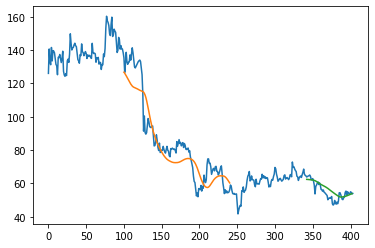

In [ ]:
from tensorflow.python import train
look_back = 100
trainPredictPlot = np.empty_like(close)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict

testPredictPlot = np.empty_like(close)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+ 1 : len(close)-1,:] = test_predict
plt.plot(scalar.inverse_transform(close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Predicting future 4 days

In [ ]:
len(test_data)

162

In [ ]:
x_input = test_data[62:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
from numpy import array

lst_output = []
n_steps = 100
i = 0
while (i<30):
  if (len(temp_input)>100):
    x_input = np.array(temp_input[1:])
    print('{} day input {}'.format(i,x_input))
    x_input = x_input.reshape(1,-1)
    x_input = x_input.reshape((1,n_steps,1))

    yhat = model.predict(x_input,verbose=0)
    print('{} day output {}'.format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    lst_output.extend(yhat.tolist())
    i+=1
  else:
    x_input = x_input.reshape((1,n_steps,1))
    yhat = model.predict(x_input,verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i = i+1
  
print(lst_output)

[0.10523263]
101
1 day input [0.17067004 0.17699115 0.17994099 0.17193424 0.16561313 0.1698272
 0.17446268 0.19342601 0.19764009 0.17656971 0.18078379 0.18415506
 0.17994099 0.17319847 0.17994099 0.19764009 0.19932576 0.18794774
 0.26253688 0.23556676 0.2385166  0.22798142 0.21955327 0.21491782
 0.19089761 0.18794774 0.1694058  0.18162662 0.18836914 0.19174041
 0.18457646 0.19890433 0.21070375 0.22671725 0.20058993 0.19511168
 0.19216178 0.1866835  0.18963337 0.19174041 0.19342601 0.19679729
 0.18963337 0.17277707 0.17277707 0.17867675 0.16603453 0.14580699
 0.1011378  0.13906447 0.14580699 0.15592077 0.16182045 0.14875683
 0.15718498 0.14580699 0.12389378 0.12262957 0.11462283 0.12094394
 0.10998735 0.10703748 0.1019806  0.09776653 0.09313105 0.07163927
 0.07880319 0.07964599 0.08259586 0.07880319 0.08807414 0.0514117
 0.04466919 0.04846186 0.068268   0.05478297 0.04930466 0.05983985
 0.0514117  0.06489673 0.10661608 0.10745891 0.09818793 0.0855457
 0.07332488 0.07248208 0.08217446 0.

In [ ]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [ ]:
len(close)

404

In [ ]:
close1 = close.tolist()
close1.extend(lst_output)

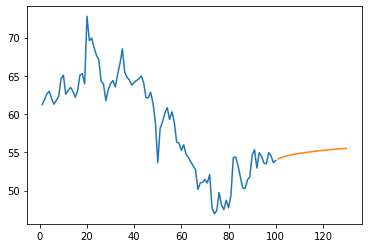

In [ ]:
plt.plot(day_new,scalar.inverse_transform(close[304:]))
plt.plot(day_pred,scalar.inverse_transform(lst_output))